In [2]:
from google.colab import files
uploaded = files.upload()


Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

- ## **Import the dataset and check relevant information**

In [4]:
df = pd.read_csv("Titanic-Dataset.csv")

print(df) # Shows the dataset

print(df.head())

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

## **1) Generating summary statistics such as mean, median and standard deviation.**

In [5]:
# Checking basic information about the dataset
df.info()

# Summary statistics
df.describe()

# Checking missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## **2) Creating histograms and boxplots for numeric features.**

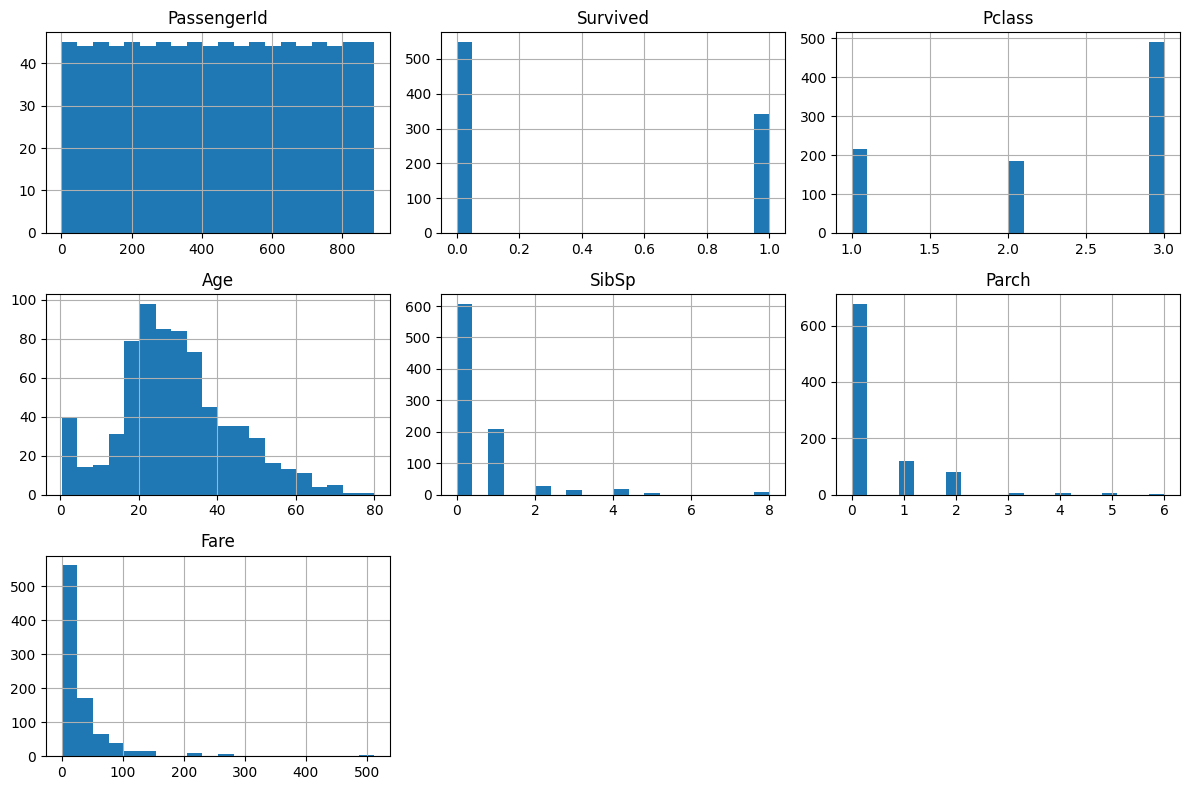

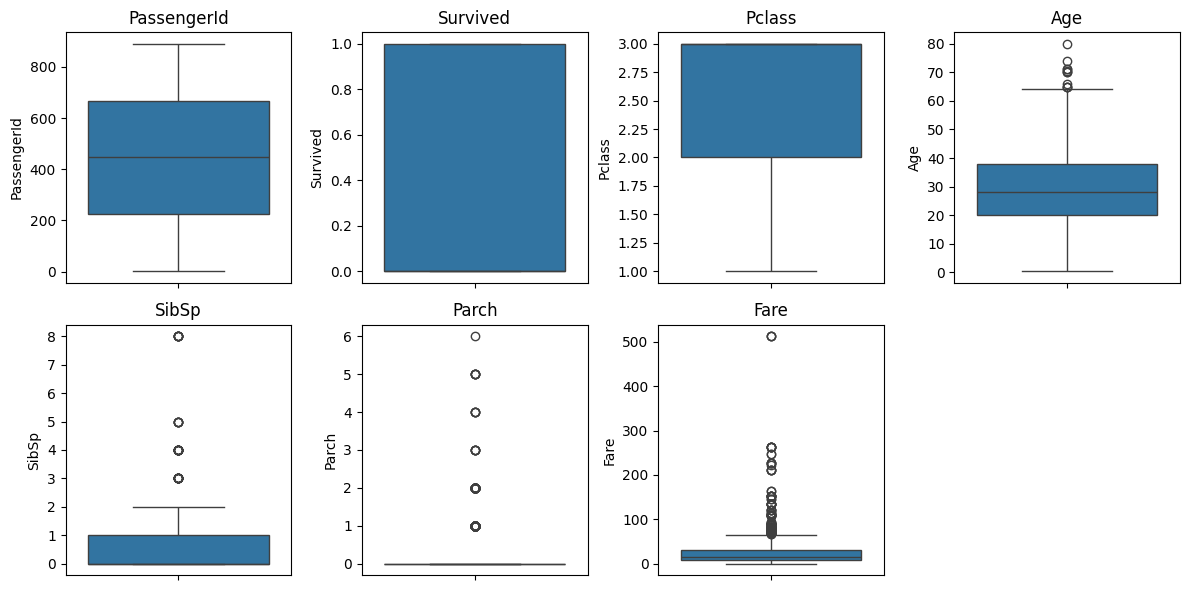

In [6]:
num_cols = df.select_dtypes(include=[np.number]).columns

# For histograms
df[num_cols].hist(figsize = (12, 8), bins = 20)
plt.tight_layout()
plt.show()

# For boxplots
plt.figure(figsize = (12, 6))
for i, col in enumerate(num_cols, 1):
  plt.subplot(2, 4, i)
  sns.boxplot(df[col])
  plt.title(col)
plt.tight_layout()
plt.show()

## **3) Using pairplot/correlation matrix for future relationships.**

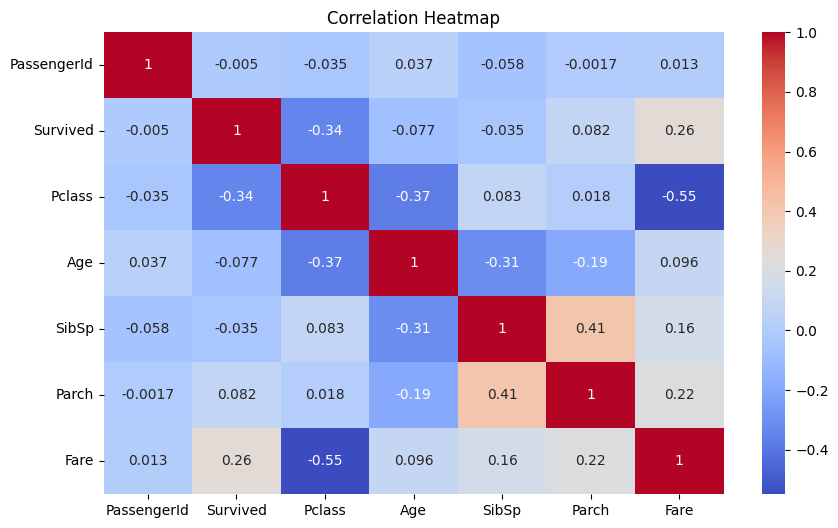

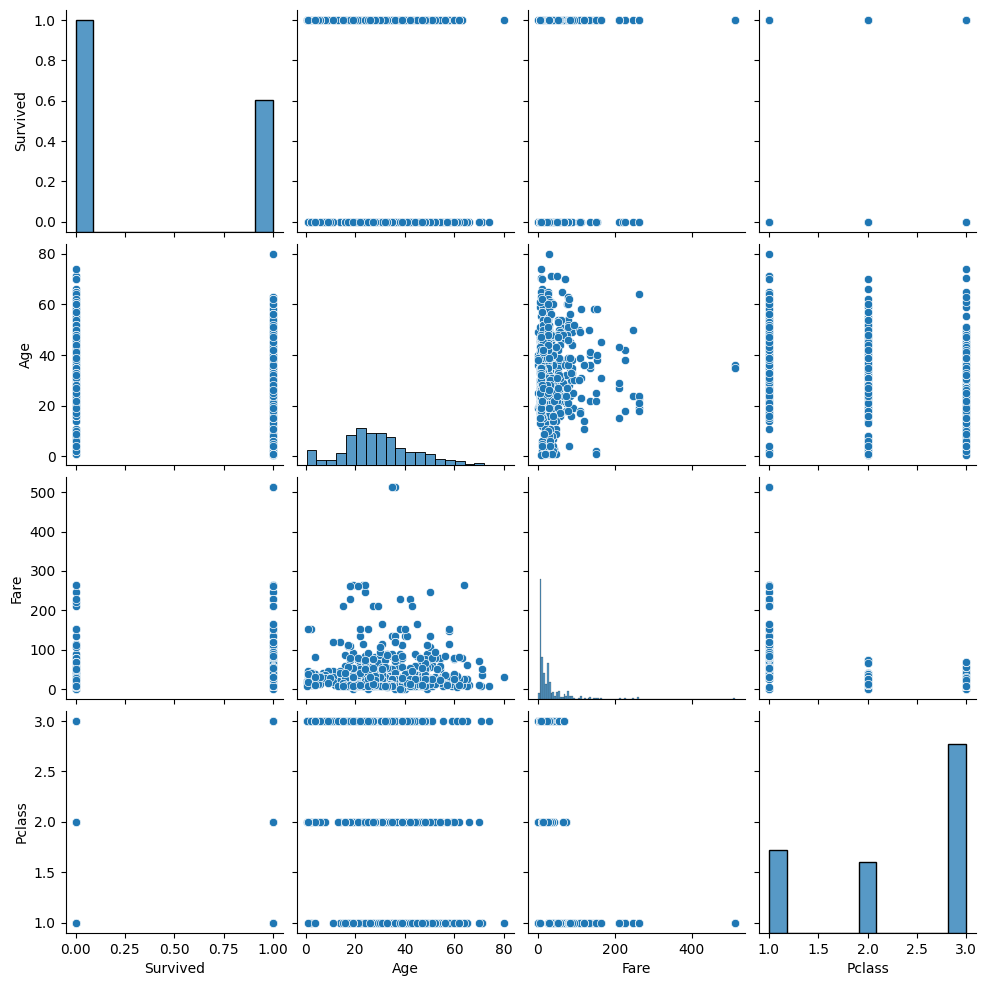

In [15]:
# Correlation heatmap

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# Pairplot for selected features
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass']])
plt.show()

## **4) Identifying trends, patterns and anomalies in the data.**

- Trends: Survival rates by categories

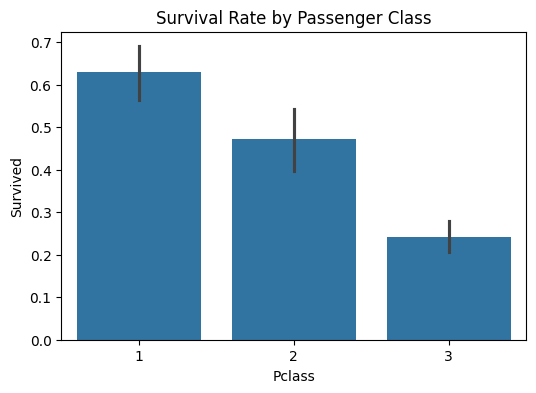

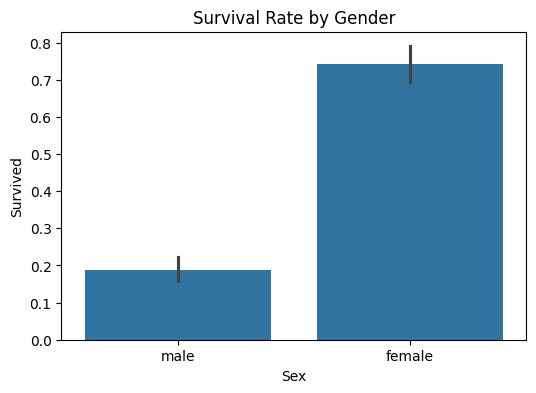

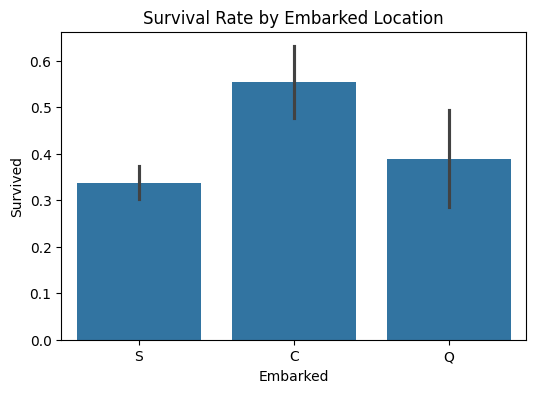

In [14]:
# Survival rate by Passenger Class

plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()


# Survival rate by Gender

plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()


# Survival rate by Embarked location

plt.figure(figsize=(6,4))
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Embarked Location')
plt.show()

- Patterns: Age and Fare distributions by survival

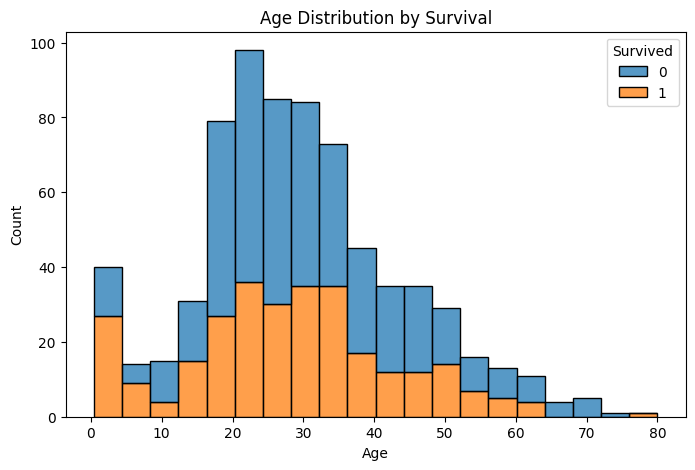

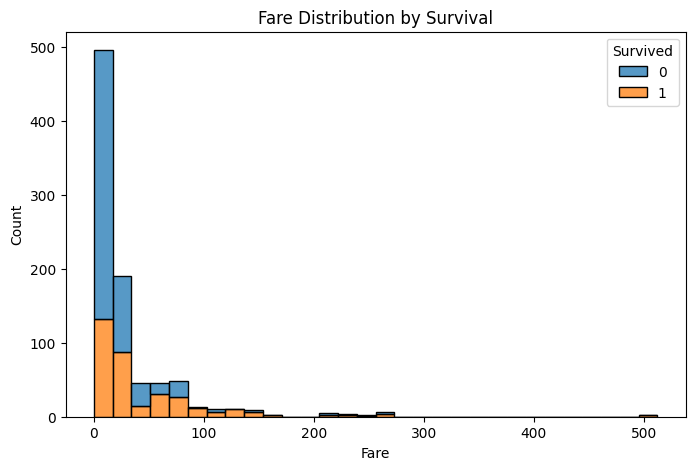

In [11]:
# Age Distribution by Survival

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=20)
plt.title('Age Distribution by Survival')
plt.show()


# Fare distribution by Survival

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Fare', hue='Survived', multiple='stack', bins=30)
plt.title('Fare Distribution by Survival')
plt.show()

- Anomalies: Outlier detections with Boxplots

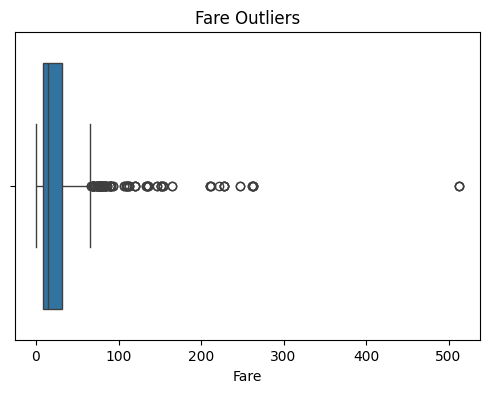

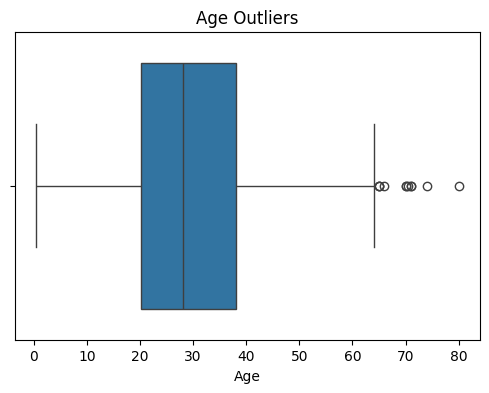

In [13]:
# Anomalies in Fare Outliers

plt.figure(figsize=(6,4))
sns.boxplot(x=df['Fare'])
plt.title('Fare Outliers')
plt.show()


# Anamolies in Age Outliers

plt.figure(figsize=(6,4))
sns.boxplot(x=df['Age'])
plt.title('Age Outliers')
plt.show()

## **4) Making basic feature - level inferences from visuals.**

### Feature-level inferences from Titanic dataset

**1) Survival by Gender**

In [16]:
survival_by_gender = df.groupby('Sex')['Survived'].mean()
print("🔹 Survival by Gender:")
for gender, rate in survival_by_gender.items():
    print(f"   - {gender.capitalize()}: {rate:.2%} survived")
print()

🔹 Survival by Gender:
   - Female: 74.20% survived
   - Male: 18.89% survived



**2) Survival by Passenger Class**

In [17]:
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print("🔹 Survival by Passenger Class:")
for pclass, rate in survival_by_class.items():
    print(f"   - Class {pclass}: {rate:.2%} survived")
print()

🔹 Survival by Passenger Class:
   - Class 1: 62.96% survived
   - Class 2: 47.28% survived
   - Class 3: 24.24% survived



  **3) Age Distribution Insights**

In [21]:
mean_age_survived = df[df['Survived'] == 1]['Age'].mean()
mean_age_not_survived = df[df['Survived'] == 0]['Age'].mean()
print(f"🔹 Average Age of Survivors: {mean_age_survived:.1f} years")
print(f"🔹 Average Age of Non-Survivors: {mean_age_not_survived:.1f} years")

🔹 Average Age of Survivors: 28.3 years
🔹 Average Age of Non-Survivors: 30.6 years


**4) Fare versus Survival**

In [22]:
mean_fare_survived = df[df['Survived'] == 1]['Fare'].mean()
mean_fare_not_survived = df[df['Survived'] == 0]['Fare'].mean()
print(f"🔹 Average Fare of Survivors: ${mean_fare_survived:.2f}")
print(f"🔹 Average Fare of Non-Survivors: ${mean_fare_not_survived:.2f}")

🔹 Average Fare of Survivors: $48.40
🔹 Average Fare of Non-Survivors: $22.12


**5) Embarked location survival**

In [23]:
survival_by_embark = df.groupby('Embarked')['Survived'].mean()
print("🔹 Survival by Embarked Location:")
for port, rate in survival_by_embark.items():
    print(f"   - {port}: {rate:.2%} survived")

🔹 Survival by Embarked Location:
   - C: 55.36% survived
   - Q: 38.96% survived
   - S: 33.70% survived
